In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
import plotly.express as px 
import plotly.graph_objects as go 
import plotly as py 
from plotly import tools
import os
import calendar

In [2]:
crop_path="/Users/jaideepsai/Desktop/DATA-ANALYTICS/Data Source/extracted-data/Agriculture/crop_production.csv"
crop_data=pd.read_csv(crop_path, delimiter=',')

In [3]:
crop_data.head()

State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0

In [4]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [5]:
crop_data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [6]:
statistics=crop_data.describe()
print("statistics")
print(statistics)

statistics
           Crop_Year          Area    Production
count  246091.000000  2.460910e+05  2.423610e+05
mean     2005.643018  1.200282e+04  5.825034e+05
std         4.952164  5.052340e+04  1.706581e+07
min      1997.000000  4.000000e-02  0.000000e+00
25%      2002.000000  8.000000e+01  8.800000e+01
50%      2006.000000  5.820000e+02  7.290000e+02
75%      2010.000000  4.392000e+03  7.023000e+03
max      2015.000000  8.580100e+06  1.250800e+09


In [7]:
mean_values = crop_data[['Production']].mean()
crop_data.loc[:, 'Production'] = crop_data['Production'].fillna(mean_values['Production'])

In [8]:
crop_data.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

# EDA

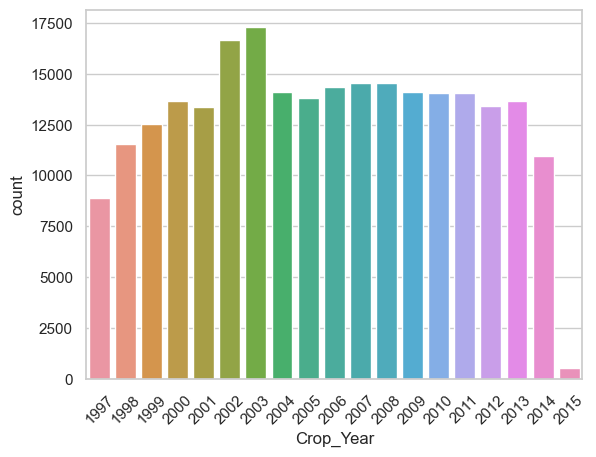

In [9]:
sns.countplot(data=crop_data,x="Crop_Year")
plt.xticks(rotation=45)
plt.show()

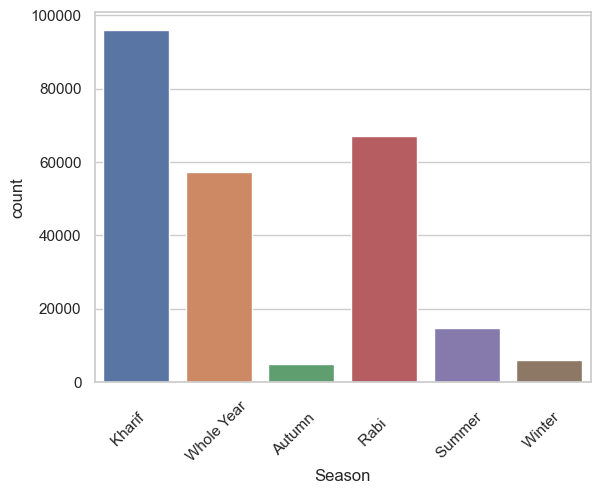

In [10]:
sns.countplot(data=crop_data,x="Season")
plt.xticks(rotation=45)
plt.show()

In [11]:
temp = crop_data.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by='Production')
px.bar(temp, 'State_Name', 'Production')

In [12]:
temp = crop_data.groupby('State_Name')[['Area', 'Production']].sum().reset_index()
temp['Production_Per_Unit_Area'] = temp['Production'] / temp['Area']
temp = temp.sort_values(by='Production_Per_Unit_Area')
px.bar(temp, 'State_Name', 'Production_Per_Unit_Area', color='Production_Per_Unit_Area')

In [13]:
temp = crop_data.groupby(by='Crop_Year')['Production'].sum().reset_index()
px.line(temp, 'Crop_Year', 'Production')

In [14]:
temp = crop_data.groupby(by='Crop_Year')['Area'].mean().reset_index()
px.scatter(temp, 'Crop_Year', 'Area', color='Area', size='Area')

In [15]:
# fig, ax = plt.subplots(len(crop_data.State_Name.unique()), 1, figsize=(25, 65), sharex='col')
# for count, state in enumerate(crop_data.State_Name.unique(), 0):
#     sns.lineplot(data=crop_data[crop_data.State_Name == state], x='Crop_Year', y='Production', errorbar=None, ax=ax[count])
#     ax[count].set_title(state)
# plt.subplots_adjust(hspace=2.2)
# plt.show()

In [16]:
temp = crop_data.groupby('State_Name')[['Area', 'Production']].sum().reset_index()
temp['Production_Per_Unit_Area'] = temp['Production'] / temp['Area']
temp = temp.sort_values(by='Production_Per_Unit_Area')

px.bar(temp, 'State_Name', 'Production_Per_Unit_Area', color='Production_Per_Unit_Area')


In [17]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create subplots
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Highest crop producing districts', 'Least overall crop producing districts'))

temp = crop_data.groupby(by='District_Name')['Production'].sum().reset_index().sort_values(by='Production')
temp1 = temp.tail()
trace1 = go.Bar(x=temp1['District_Name'], y=temp1['Production'])

temp1 = temp.head()
trace2 = go.Bar(x=temp1['District_Name'], y=temp1['Production'])

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.show()


In [18]:
temp = crop_data.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production')
px.bar(temp.tail(), 'Crop', 'Production')

In [19]:
temp[temp['Production']==0]

Crop  Production
0                 Apple         0.0
58               Litchi         0.0
94          Ribed Guard         0.0
84                Plums         0.0
35             Cucumber         0.0
80    Peas  (vegetable)         0.0
104          Snak Guard         0.0
79                 Pear         0.0
78                Peach         0.0
71   Other Citrus Fruit         0.0
72      Other Dry Fruit         0.0
12                  Ber         0.0
54              Lab-Lab         0.0
120                 Yam         0.0
121        other fibres         0.0
11            Beet Root         0.0
118         Water Melon         0.0
4             Ash Gourd         0.0

/var/folders/6v/b3h3mvdj4jq38p0vglv7c3lr0000gn/T/ipykernel_17361/4050489636.py:5: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



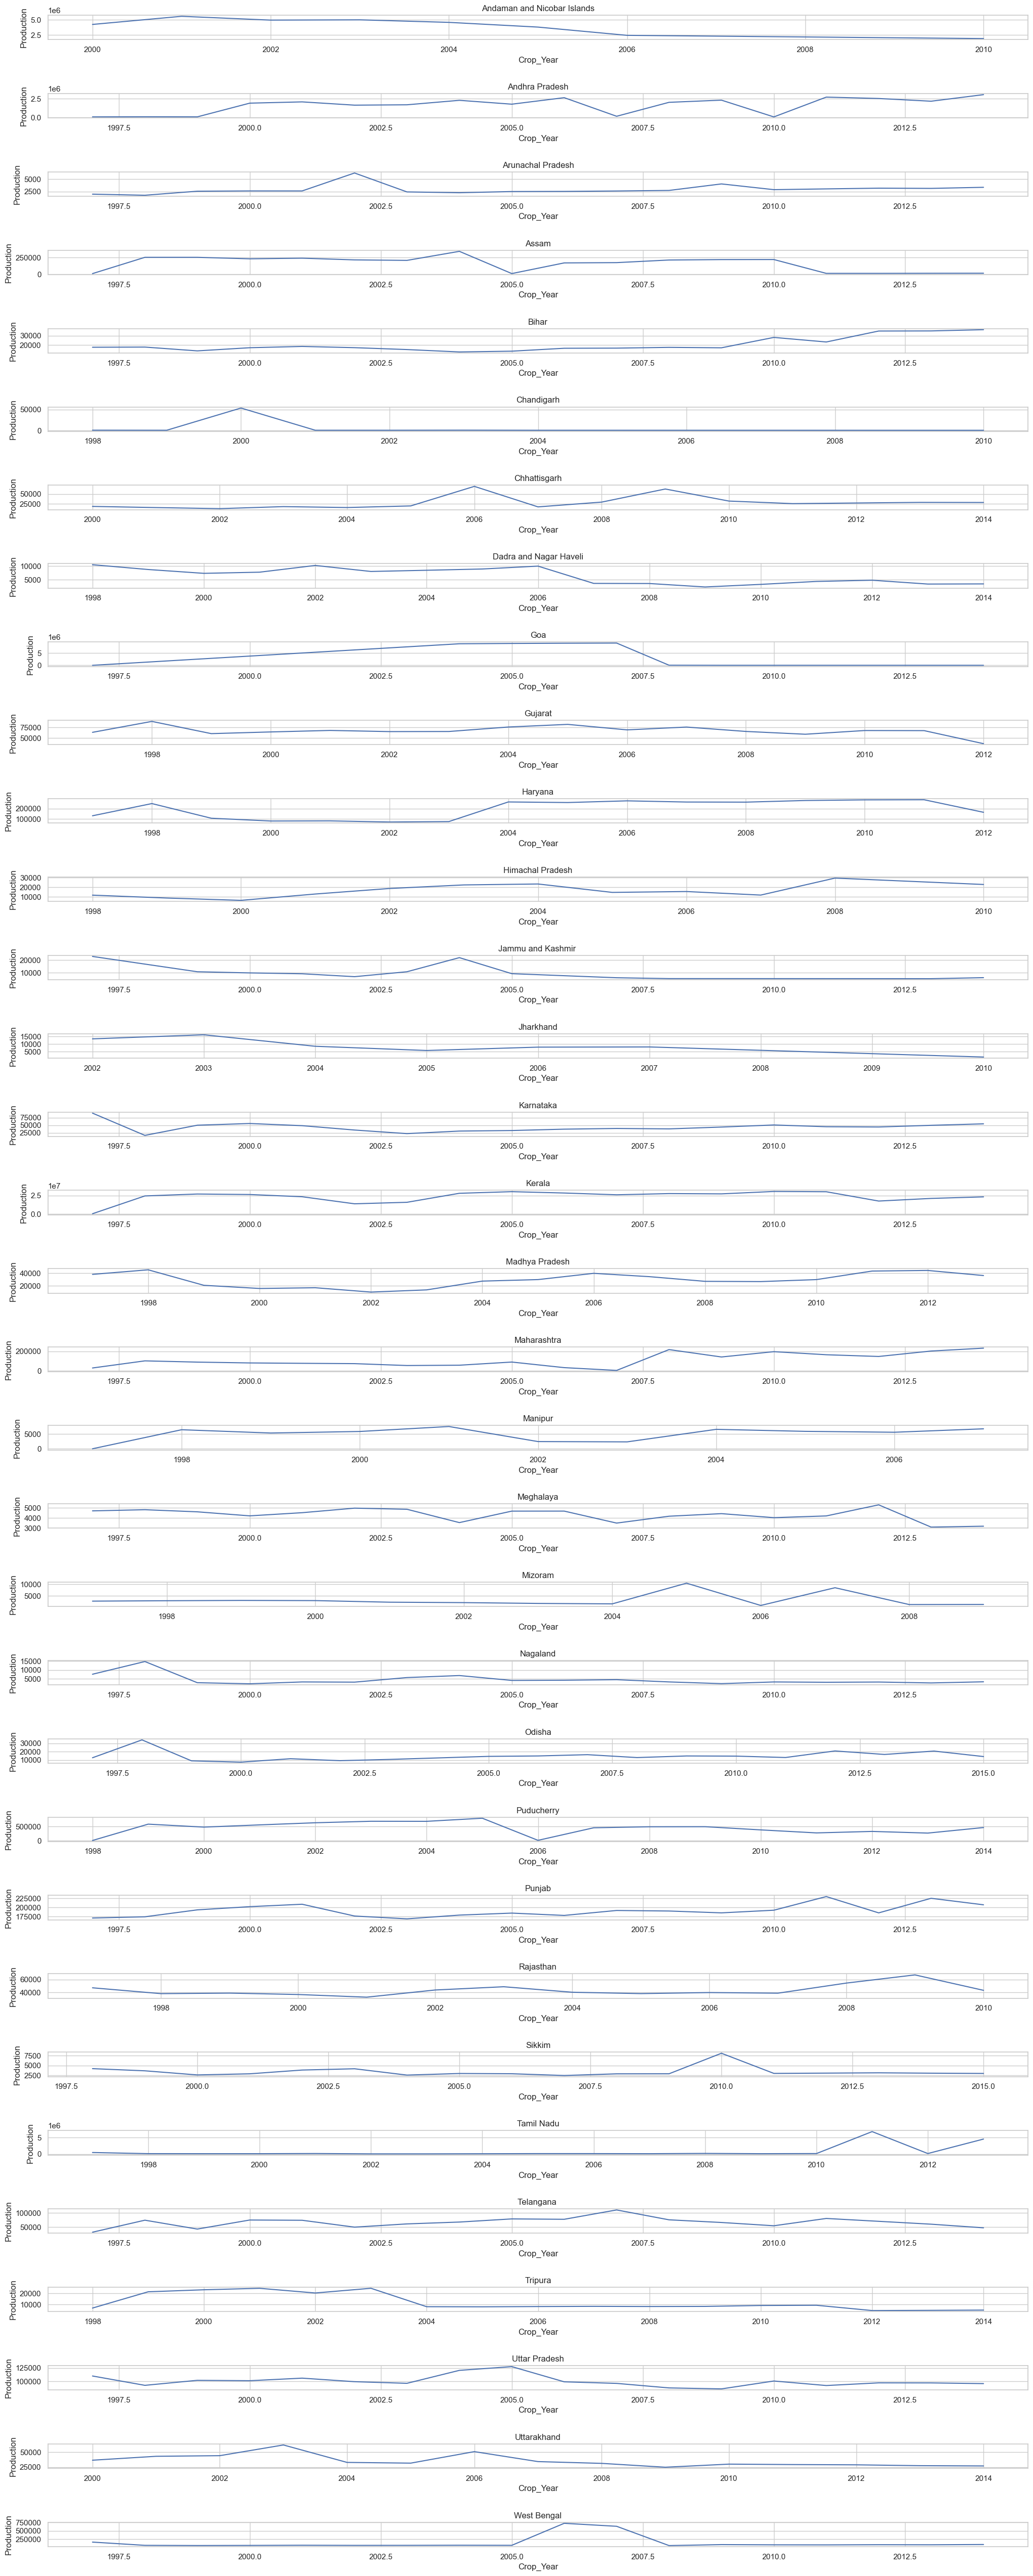

In [20]:
fig, ax = plt.subplots(figsize=(25,65), sharex='col')
count = 1

for state in crop_data.State_Name.unique():
    ax = plt.subplot(len(crop_data.State_Name.unique()), 1, count)
    sns.lineplot(x='Crop_Year', y='Production', data=crop_data[crop_data.State_Name == state], ax=ax, errorbar=None)
    plt.subplots_adjust(hspace=2.2)
    plt.title(state)
    count += 1

In [21]:
north_india = ['Jammu and Kashmir', 'Punjab', 'Himachal Pradesh', 'Haryana', 'Uttarakhand', 'Uttar Pradesh', 'Chandigarh']
east_india = ['Bihar', 'Odisha', 'Jharkhand', 'West Bengal']
south_india = ['Andhra Pradesh', 'Karnataka', 'Kerala' ,'Tamil Nadu', 'Telangana']
west_india = ['Rajasthan' , 'Gujarat', 'Goa','Maharashtra','Goa']
central_india = ['Madhya Pradesh', 'Chhattisgarh']
north_east_india = ['Assam', 'Sikkim', 'Nagaland', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh']
ut_india = ['Andaman and Nicobar Islands', 'Dadra and Nagar Haveli', 'Puducherry']

In [22]:
def get_zonal_names(row):
    if row['State_Name'].strip() in north_india:
        val = 'North Zone'
    elif row['State_Name'].strip()  in south_india:
        val = 'South Zone'
    elif row['State_Name'].strip()  in east_india:
        val = 'East Zone'
    elif row['State_Name'].strip()  in west_india:
        val = 'West Zone'
    elif row['State_Name'].strip()  in central_india:
        val = 'Central Zone'
    elif row['State_Name'].strip()  in north_east_india:
        val = 'NE Zone'
    elif row['State_Name'].strip()  in ut_india:
        val = 'Union Terr'
    else:
        val = 'No Value'
    return val

crop_data['Zones'] = crop_data.apply(get_zonal_names, axis=1)
crop_data['Zones'].unique()

array(['Union Terr', 'South Zone', 'NE Zone', 'East Zone', 'North Zone',
       'Central Zone', 'West Zone'], dtype=object)

/var/folders/6v/b3h3mvdj4jq38p0vglv7c3lr0000gn/T/ipykernel_17361/380658054.py:8: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



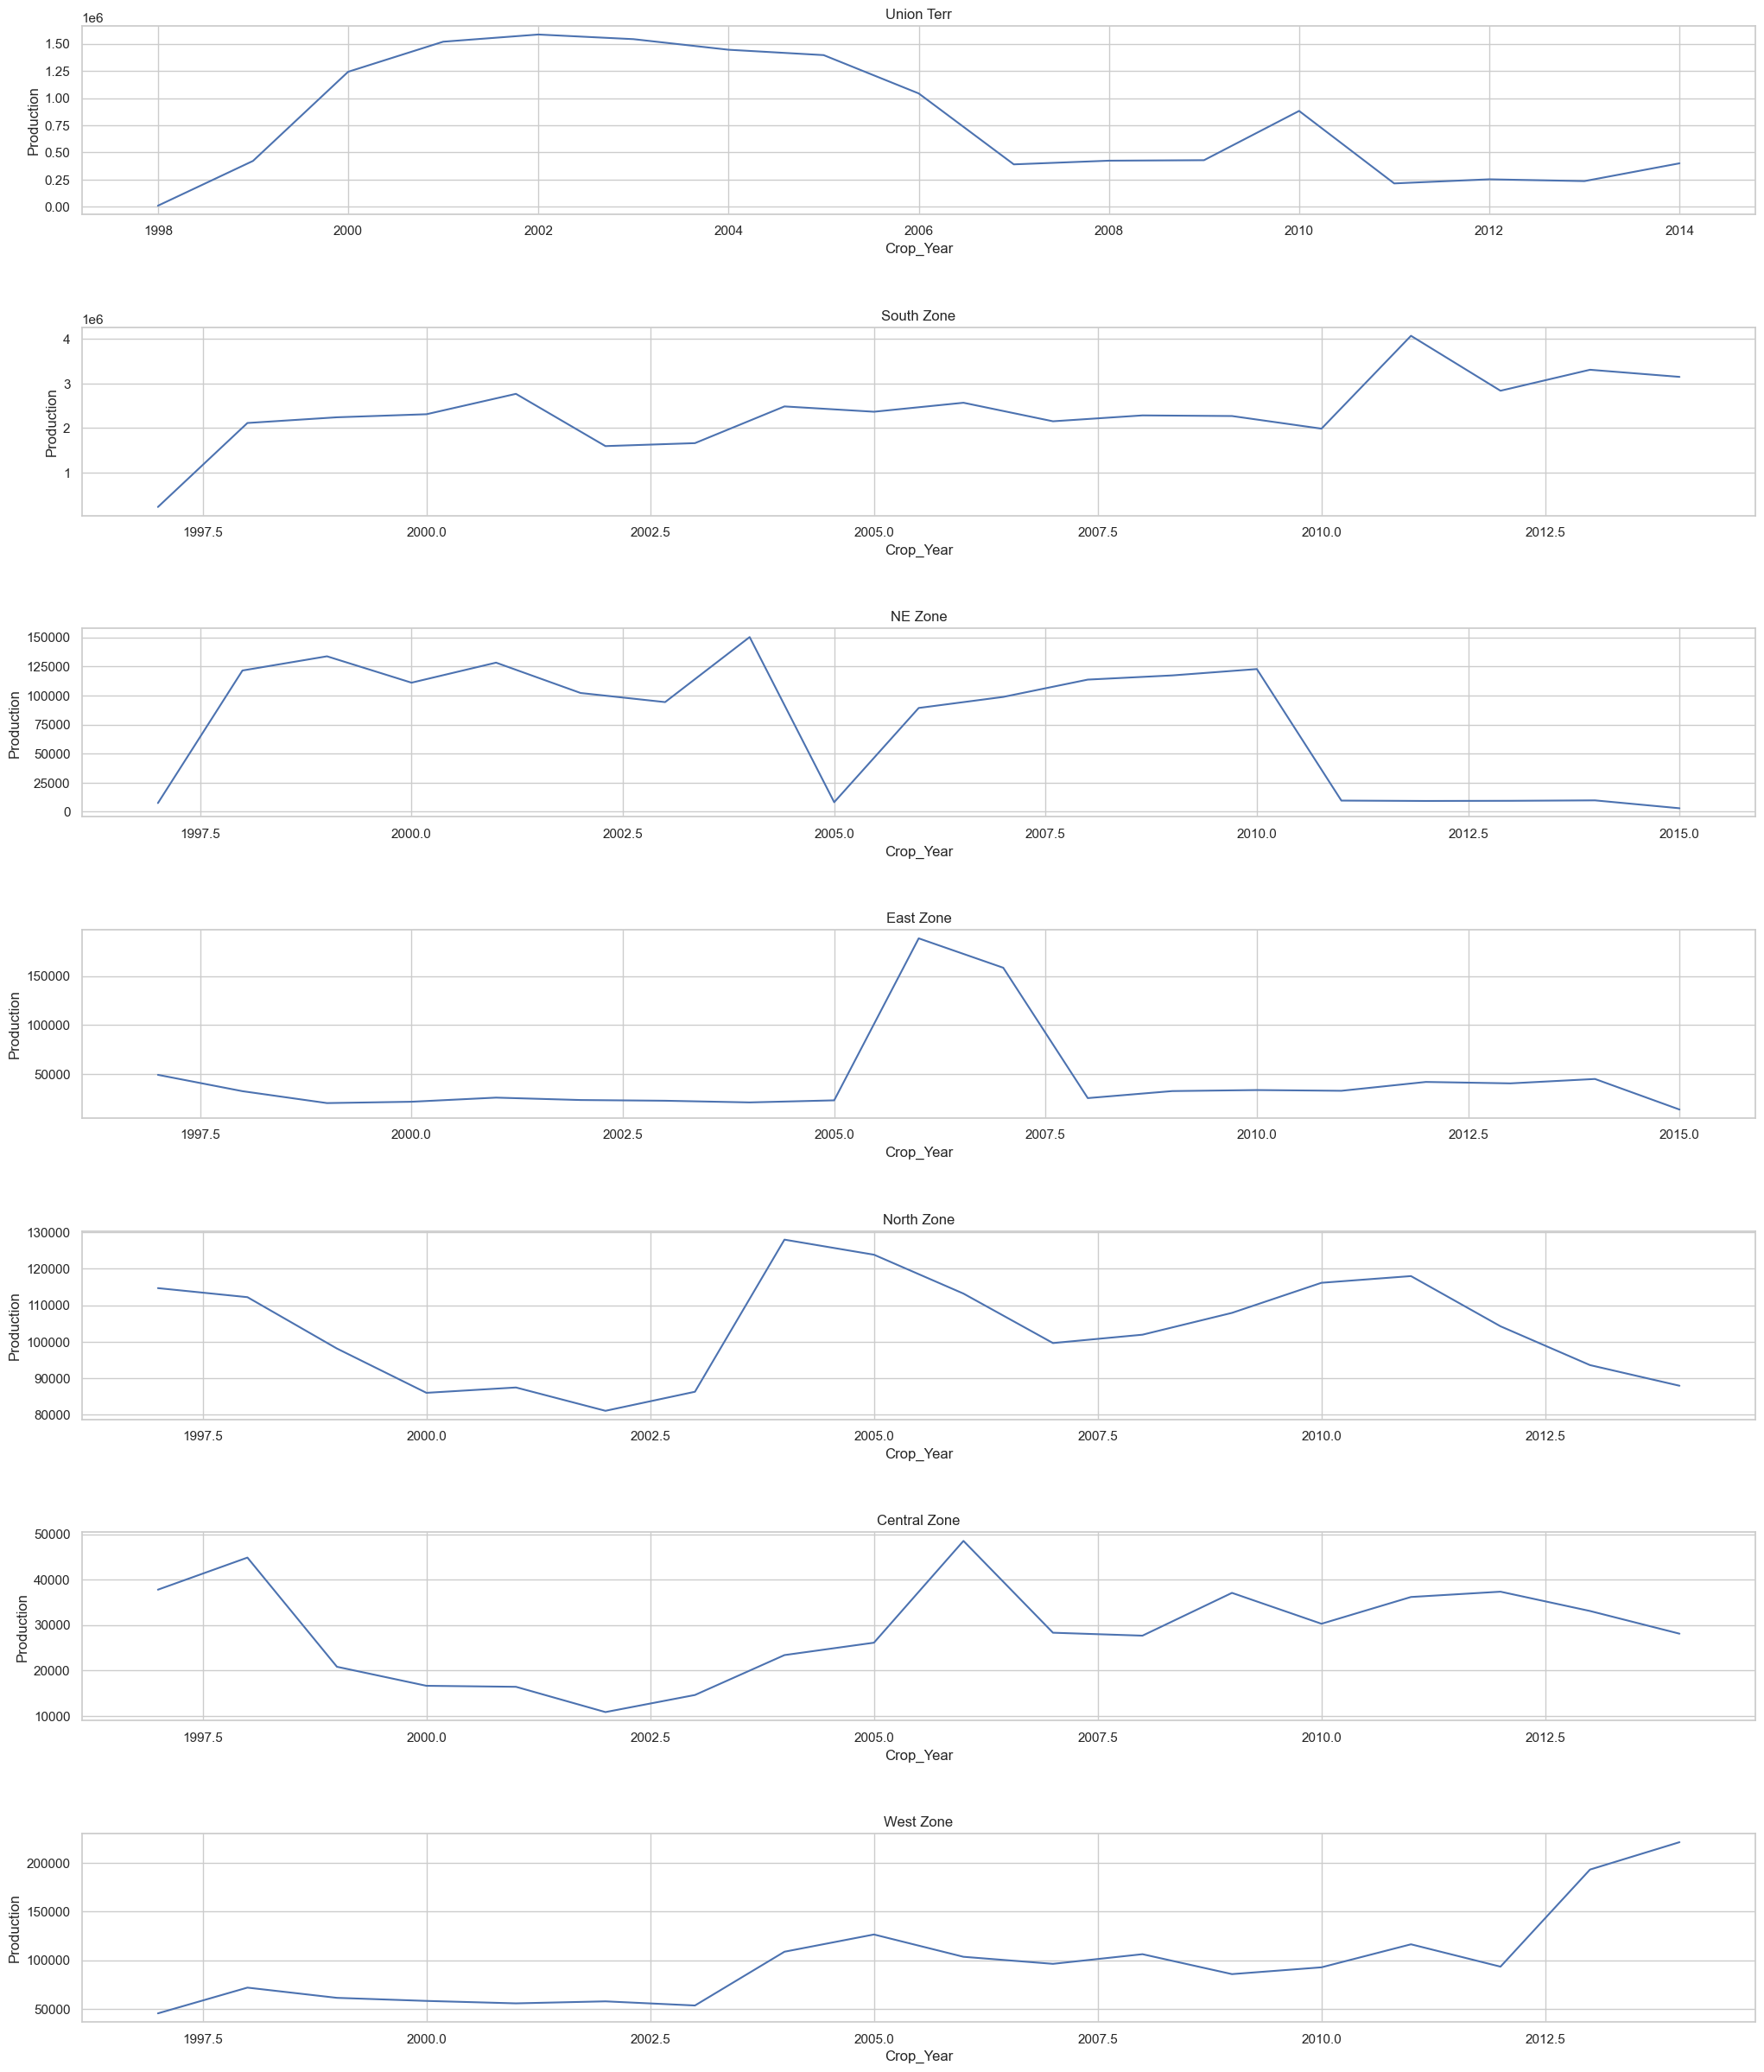

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(25,30), sharex='col')
count = 1

for zone in crop_data.Zones.unique():
    ax = plt.subplot(len(crop_data.Zones.unique()), 1, count)
    sns.lineplot(data=crop_data[crop_data.Zones==zone], x='Crop_Year', y='Production', ax=ax, errorbar=None)
    plt.subplots_adjust(hspace=0.6)
    plt.title(zone)
    count += 1


In [24]:
zone_df = crop_data.groupby(by='Zones')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)
zone_df.head()

Zones    Production
4  South Zone  1.288915e+11
3  North Zone  5.294000e+09
6   West Zone  2.954800e+09
2     NE Zone  2.172878e+09
1   East Zone  1.981505e+09

Text(0.5, 1.0, 'Zone-Wise Production: Total')

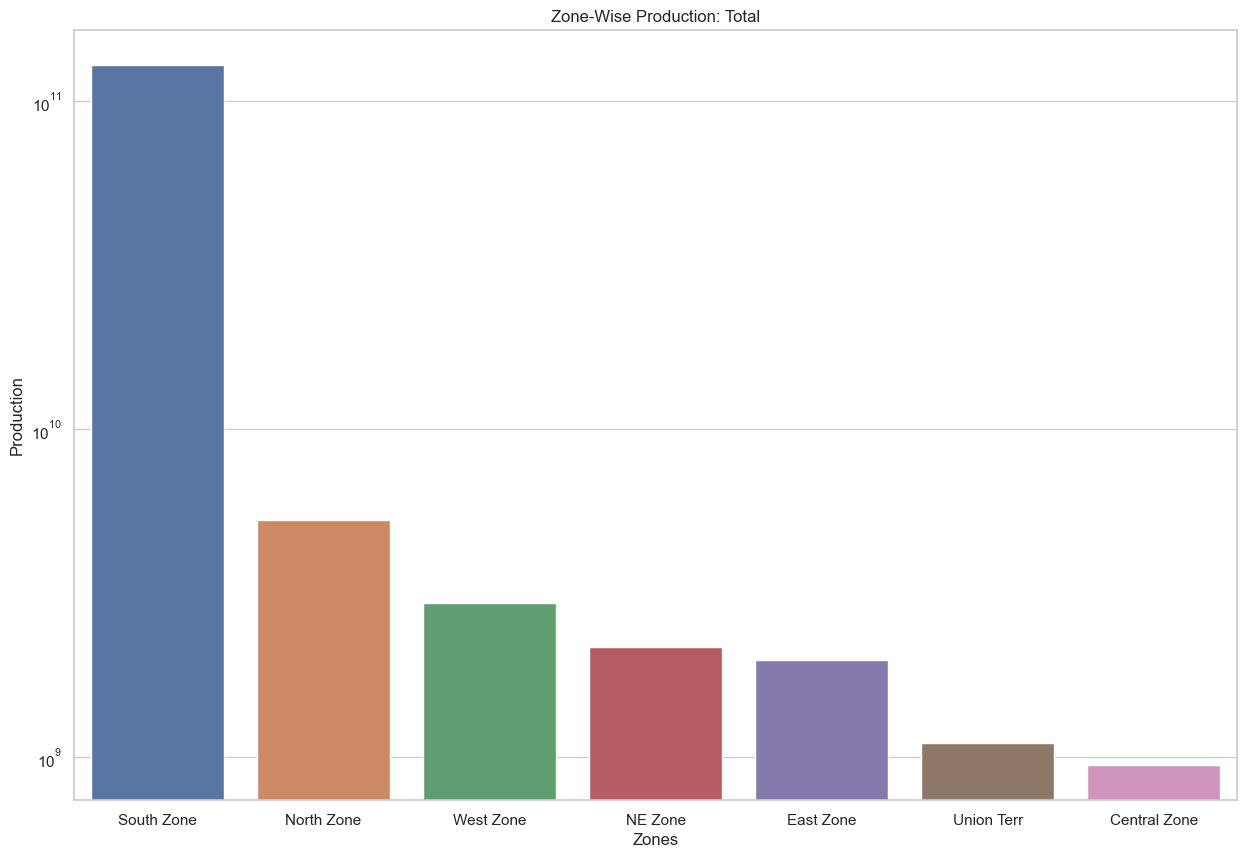

In [25]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='Zones', y='Production', data=zone_df)
plt.yscale('log')
plt.title('Zone-Wise Production: Total')

In [26]:
Kharif = ['Bajra','Jowar','Maize','Millet','Rice','Soybean','Fruits','Muskmelon','Sugarcane','Watermelon','Orange','Arhar/Tur,'
'Urad','Cotton(lint)','Cowpea(Lobia)','Moong(Green Gram)','Guar seed','Moth','Tomato','Turmeric', 'Ragi']
Rabi = ['Barley', 'Gram', 'Rapeseed &Mustard', 'Masoor', 'Coriander', 'Sunflower', 'Tobacco', 'Brinjal', 'Cabbage',
       'Onion','Sweet potato','Potato','Peas & beans (Pulses)', 'Oilseeds total', 'other oilseeds', 'Banana', 'Groundnut', 'Niger seed',
       'Sesamum','Safflower', 'Castor seed', 'Linseed', 'Soyabean']

def change_crop_seasons(row):
    if row['Crop'].strip() in Kharif:
        val = 'Kharif'
    elif row['Crop'].strip()  in Rabi:
        val = 'Rabi'
    else:
        val = 'Others'
    return val

crop_data['Updated_Crop_Season'] = crop_data.apply(change_crop_seasons, axis=1)
crop_data['Updated_Crop_Season'].unique()


array(['Others', 'Kharif', 'Rabi'], dtype=object)

Text(0.5, 1.0, 'Seasonal Crops vs Production')

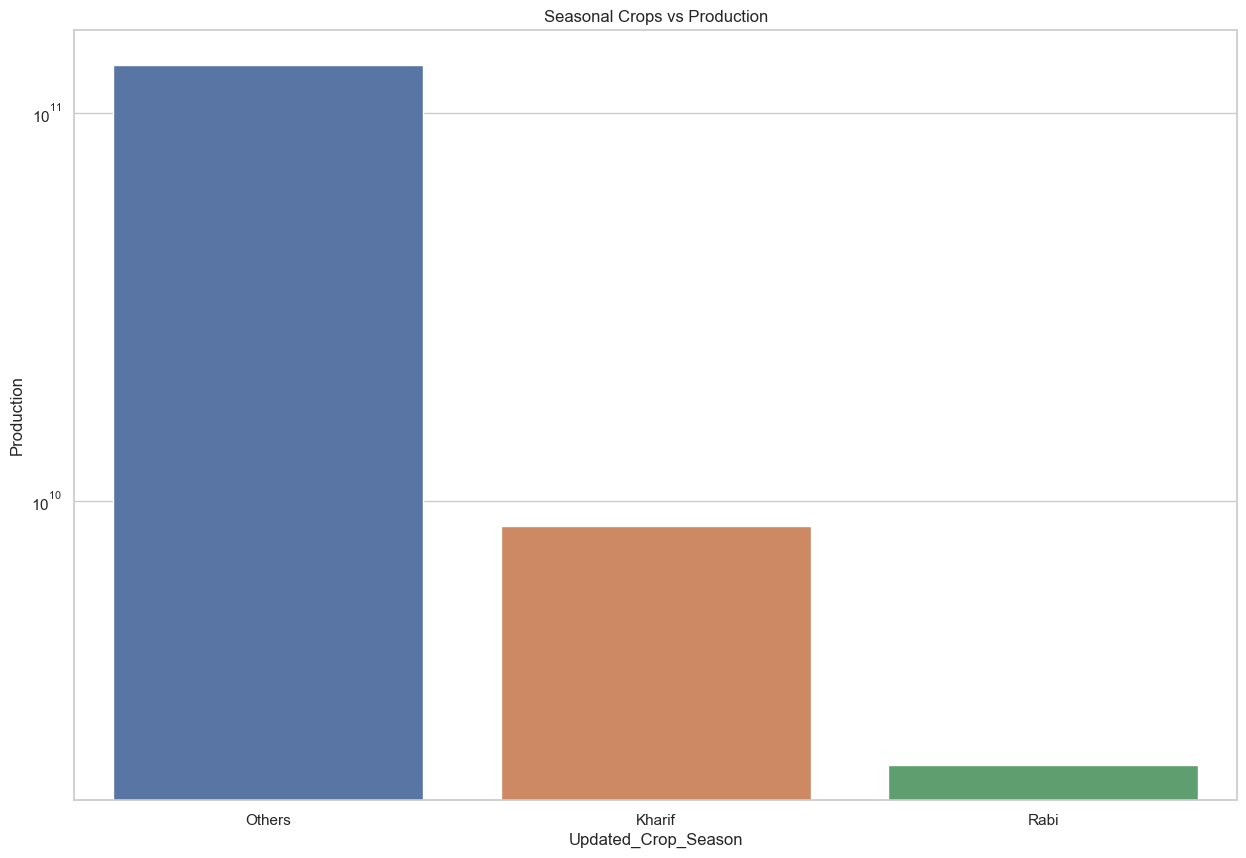

In [27]:
season = crop_data.groupby(by='Updated_Crop_Season')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
season
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='Updated_Crop_Season', y='Production', data=season, errwidth=0)
plt.yscale('log')
plt.title('Seasonal Crops vs Production')


Text(0.5, 1.0, 'Top 10 Crops in Kharif Season: Production')

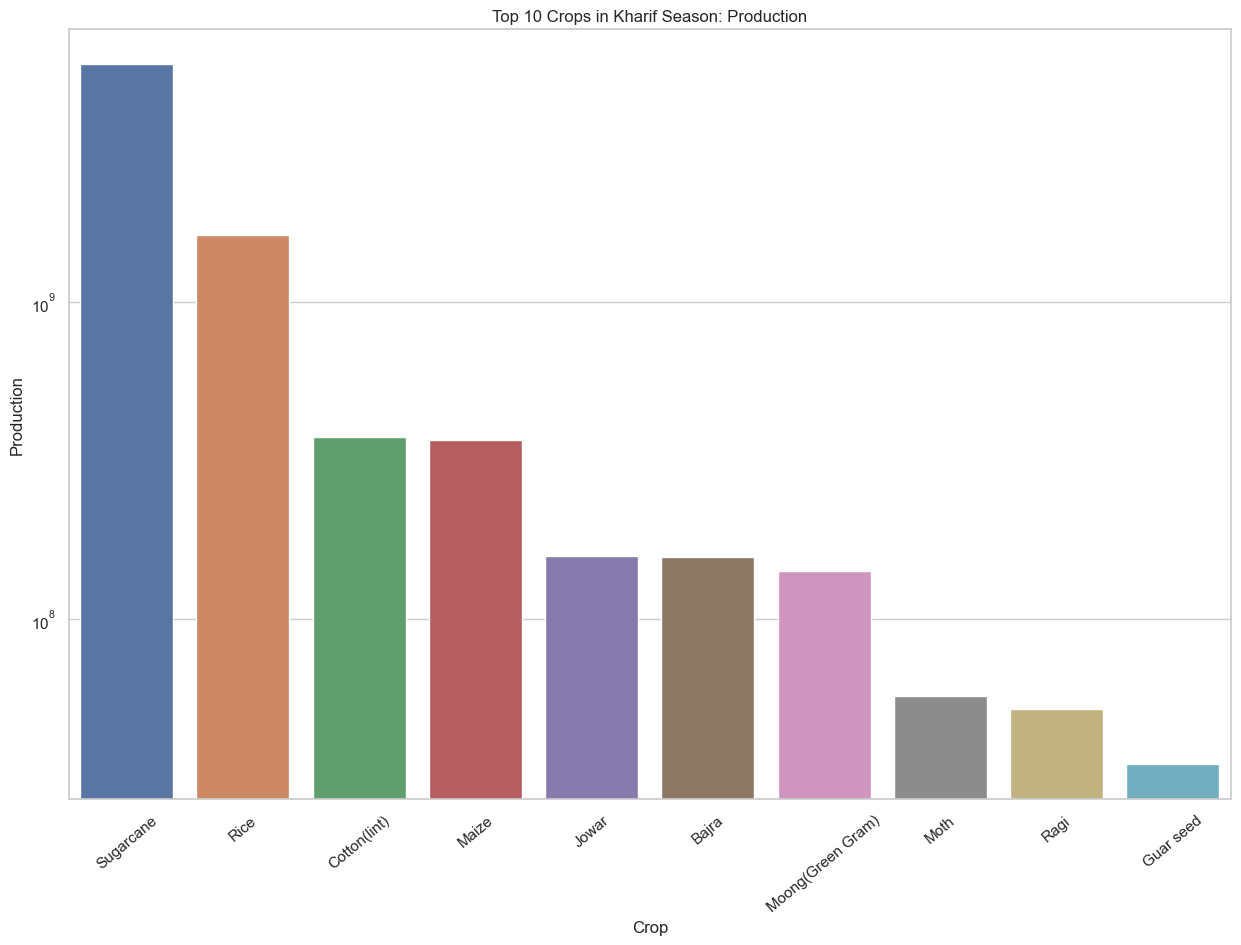

In [28]:
kharif_df = crop_data[(crop_data['Updated_Crop_Season'] == 'Kharif')]
df = kharif_df.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='Crop', y='Production', data=df, errwidth=0)
plt.yscale('log')
plt.xticks(rotation=40)
plt.title('Top 10 Crops in Kharif Season: Production')


Text(0.5, 1.0, 'Sugarcane Production Across Zones')

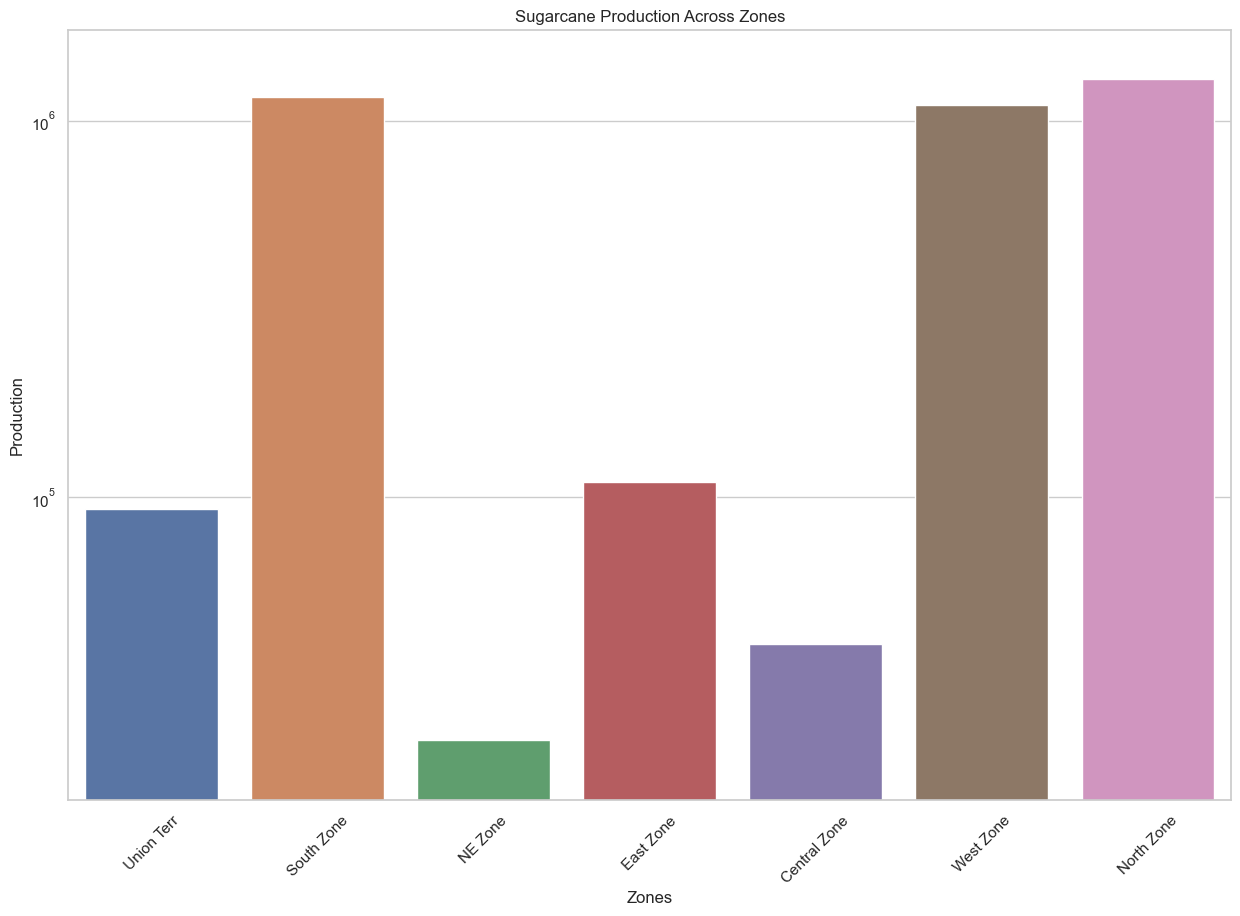

In [29]:
sugarcane_df = kharif_df[(kharif_df['Crop'] == 'Sugarcane')]
sugarcane_df.head()
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='Zones', y='Production', data=sugarcane_df, errwidth=0)
plt.yscale('log')
plt.xticks(rotation=45)
plt.title('Sugarcane Production Across Zones')


Text(0.5, 1.0, 'Sugarcane State-Wise Production')

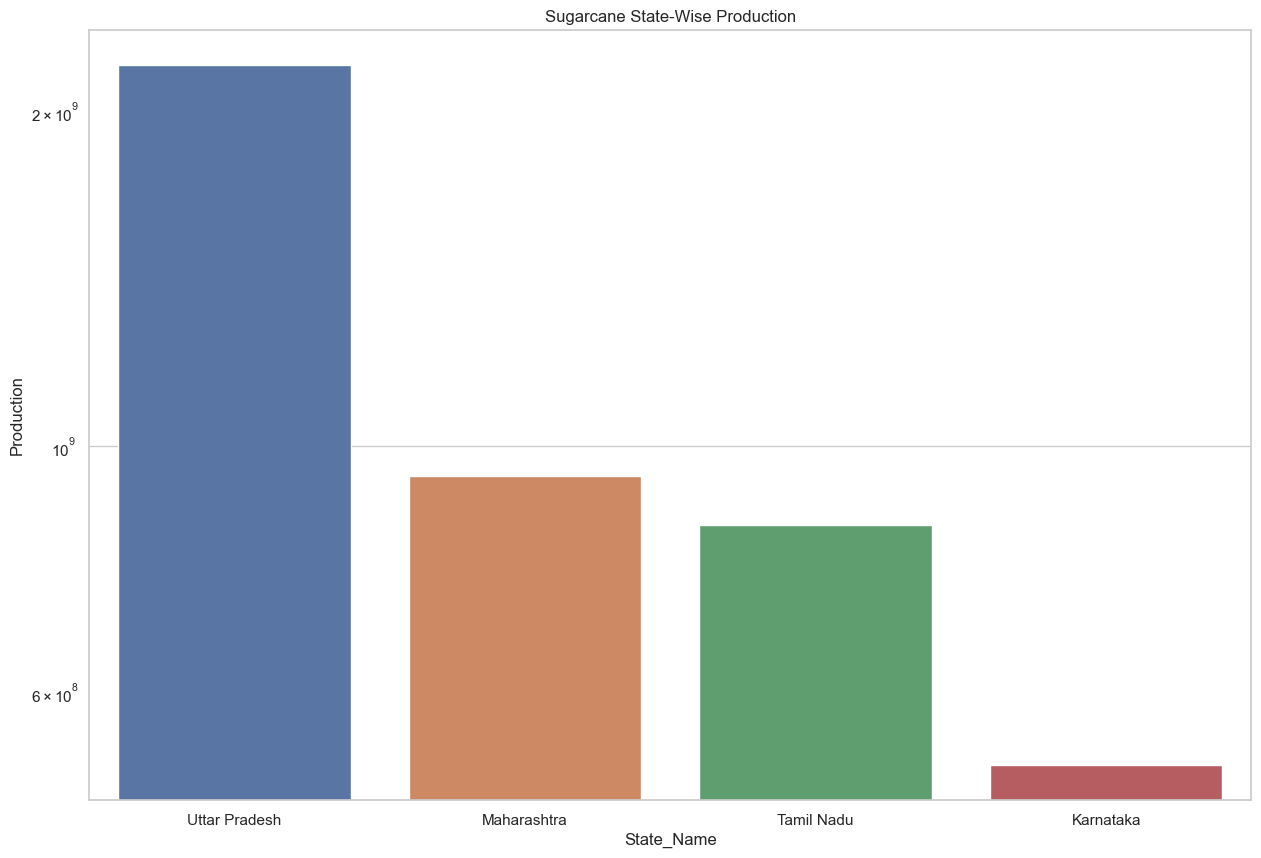

In [30]:
df = sugarcane_df.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x='State_Name', y='Production',data=df.head(4),errwidth=0)
plt.yscale('log')
plt.title('Sugarcane State-Wise Production')

District_Name       Crop       Area
45          KHERI  Sugarcane  3944916.0
57  MUZAFFARNAGAR  Sugarcane  3867761.0
16         BIJNOR  Sugarcane  3827478.0
62     SAHARANPUR  Sugarcane  2340820.0
54         MEERUT  Sugarcane  2288688.0

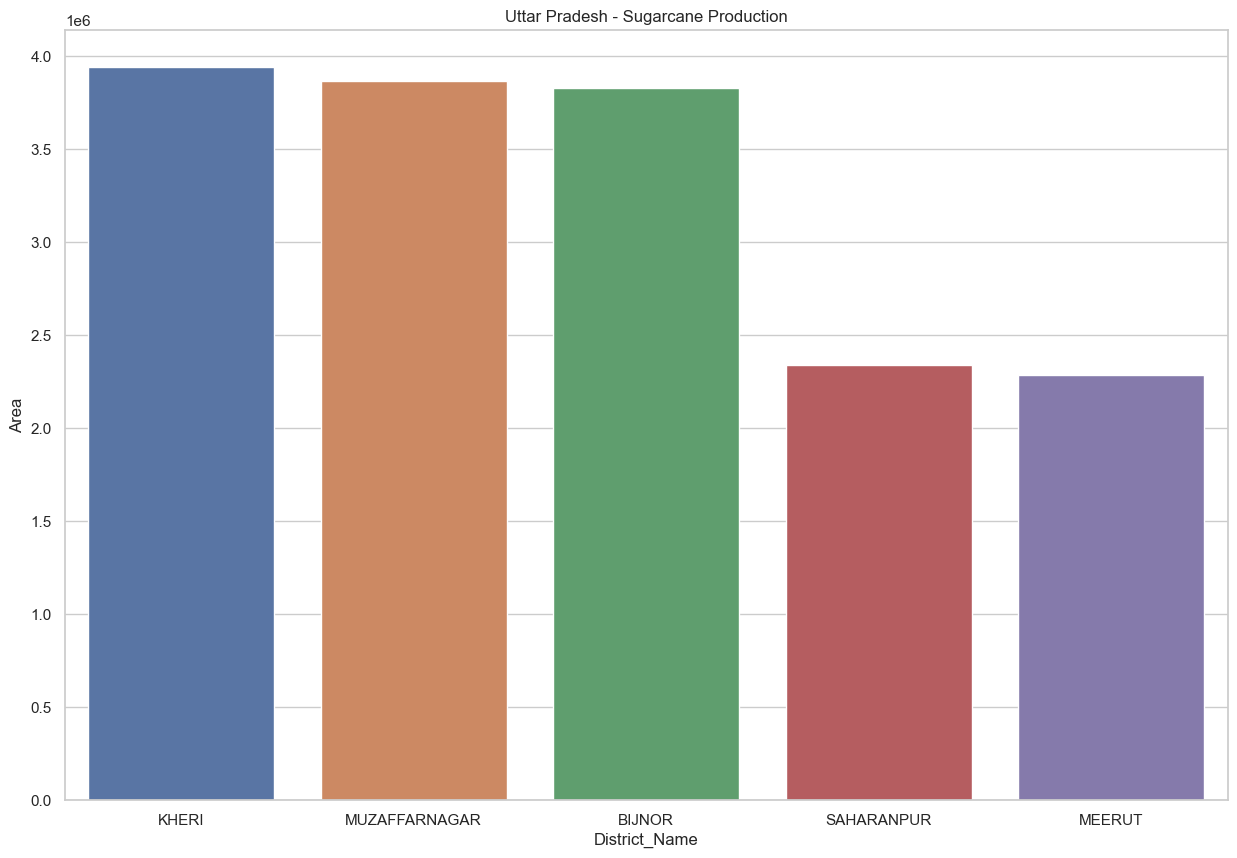

In [31]:
uttarpr_df = sugarcane_df[(sugarcane_df['State_Name'] == 'Uttar Pradesh')]
df = uttarpr_df.groupby(by=['District_Name', 'Crop'])['Area'].sum().reset_index().sort_values(by='Area', ascending=False)
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x='District_Name', y='Area', data=df.head(5),errwidth=0)
plt.title('Uttar Pradesh - Sugarcane Production')
df.head(5)

Text(0.5, 1.0, 'Rabi Crops Production')

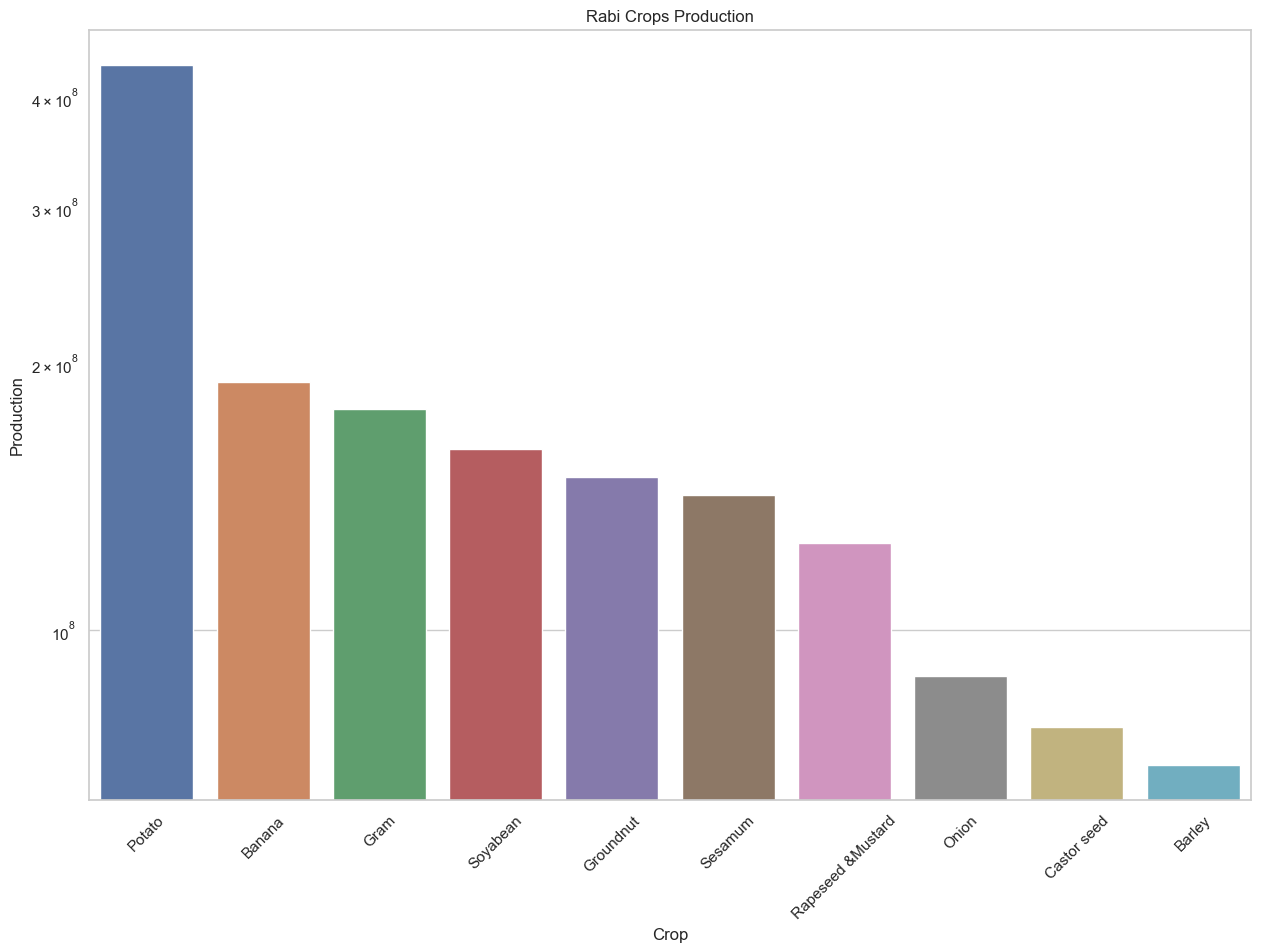

In [32]:
rabi_df = crop_data[(crop_data['Updated_Crop_Season'] == 'Rabi')]
df = rabi_df.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x='Crop', y='Production',data=df, errwidth=0)
plt.yscale('log')
plt.xticks(rotation=45)
plt.title('Rabi Crops Production')

Text(0.5, 1.0, 'Potato Zone-Wise Production')

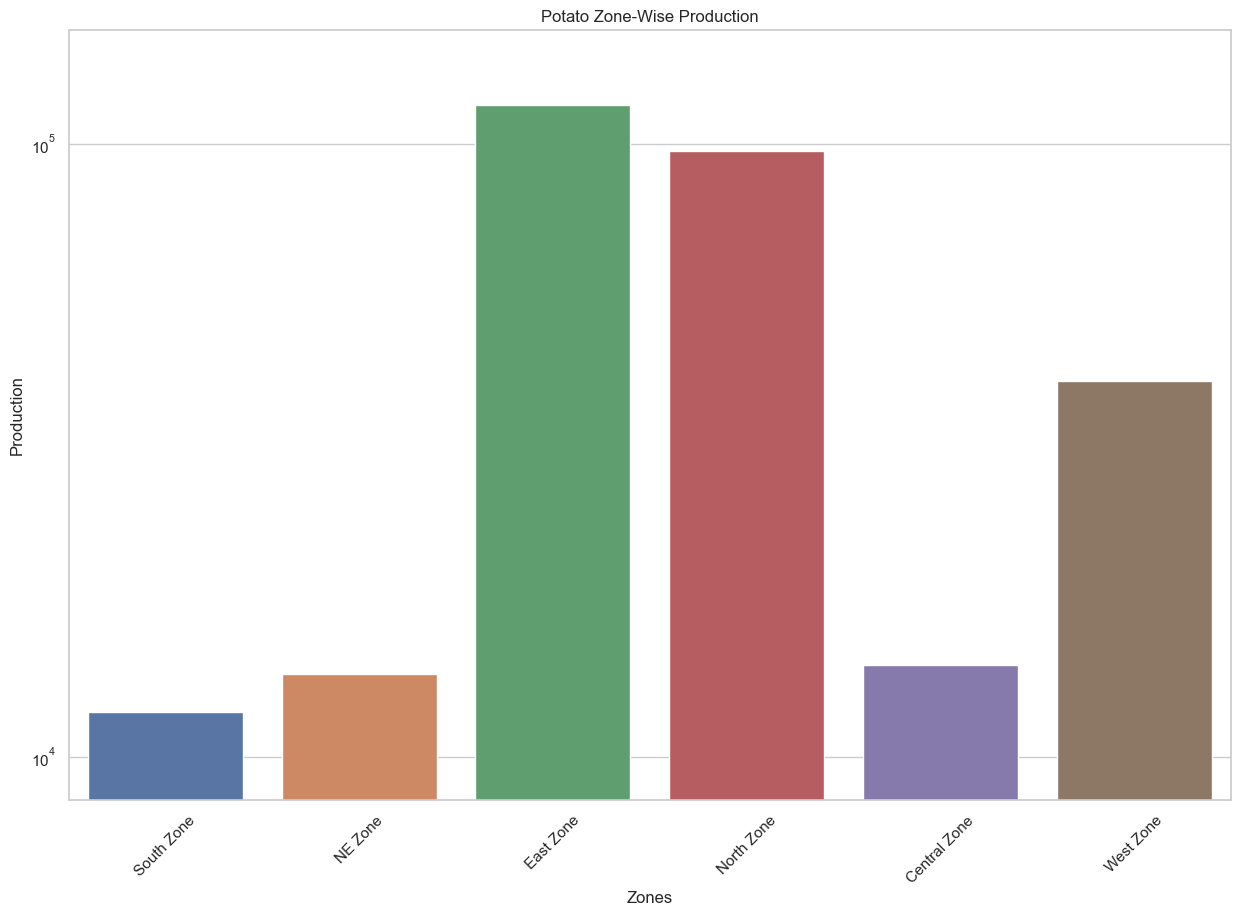

In [33]:
potato_df = rabi_df[(rabi_df['Crop'] == 'Potato')]
potato_df.head()

fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x='Zones', y='Production',data=potato_df, errwidth=0)
plt.yscale('log')
plt.xticks(rotation=45)
plt.title('Potato Zone-Wise Production')

Text(0.5, 1.0, 'Potato State-Wise Production')

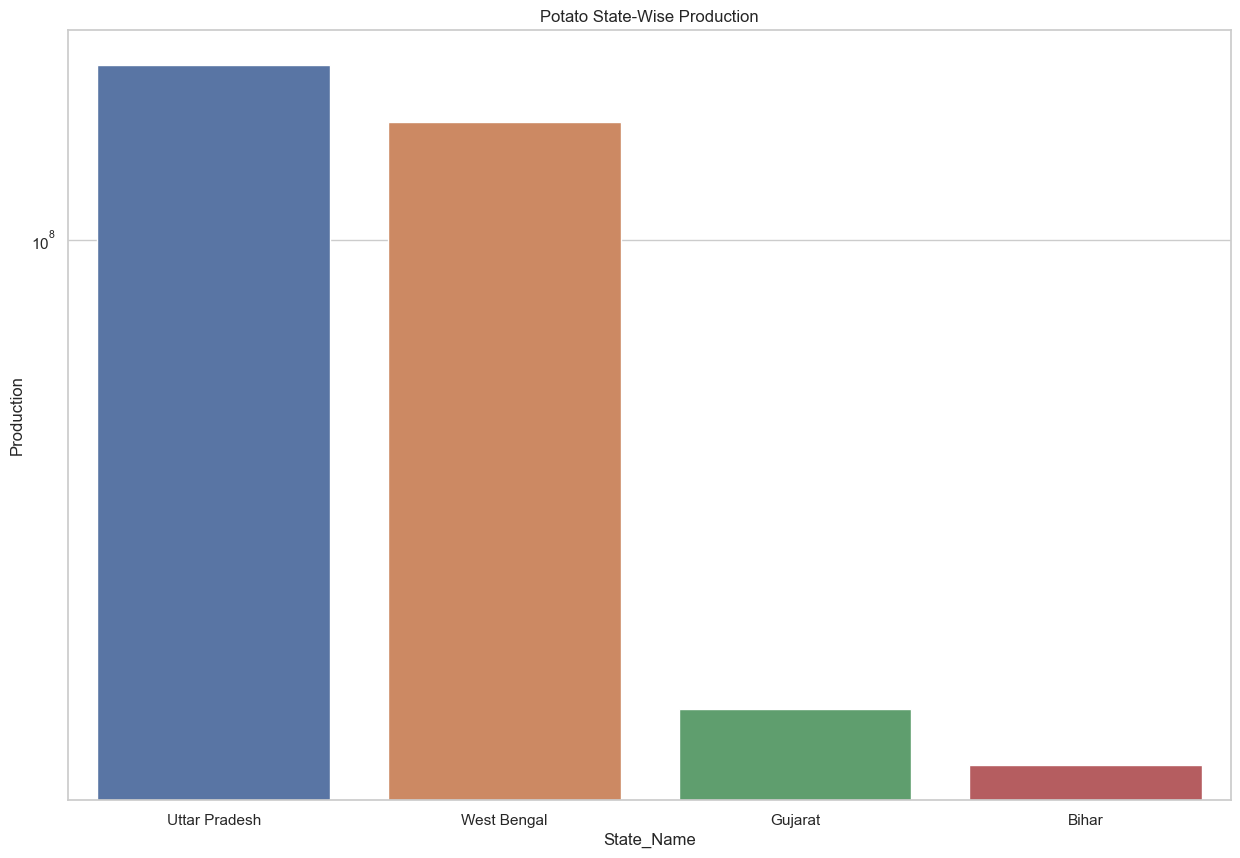

In [34]:
df = potato_df.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x='State_Name',y='Production',data=df.head(4),errwidth=0)
plt.yscale('log')
plt.title('Potato State-Wise Production')

District_Name    Crop      Area
0           AGRA  Potato  723954.0
40       KANNAUJ  Potato  691435.0
27     FIROZABAD  Potato  627652.0
25   FARRUKHABAD  Potato  557135.0
36       HATHRAS  Potato  485722.0

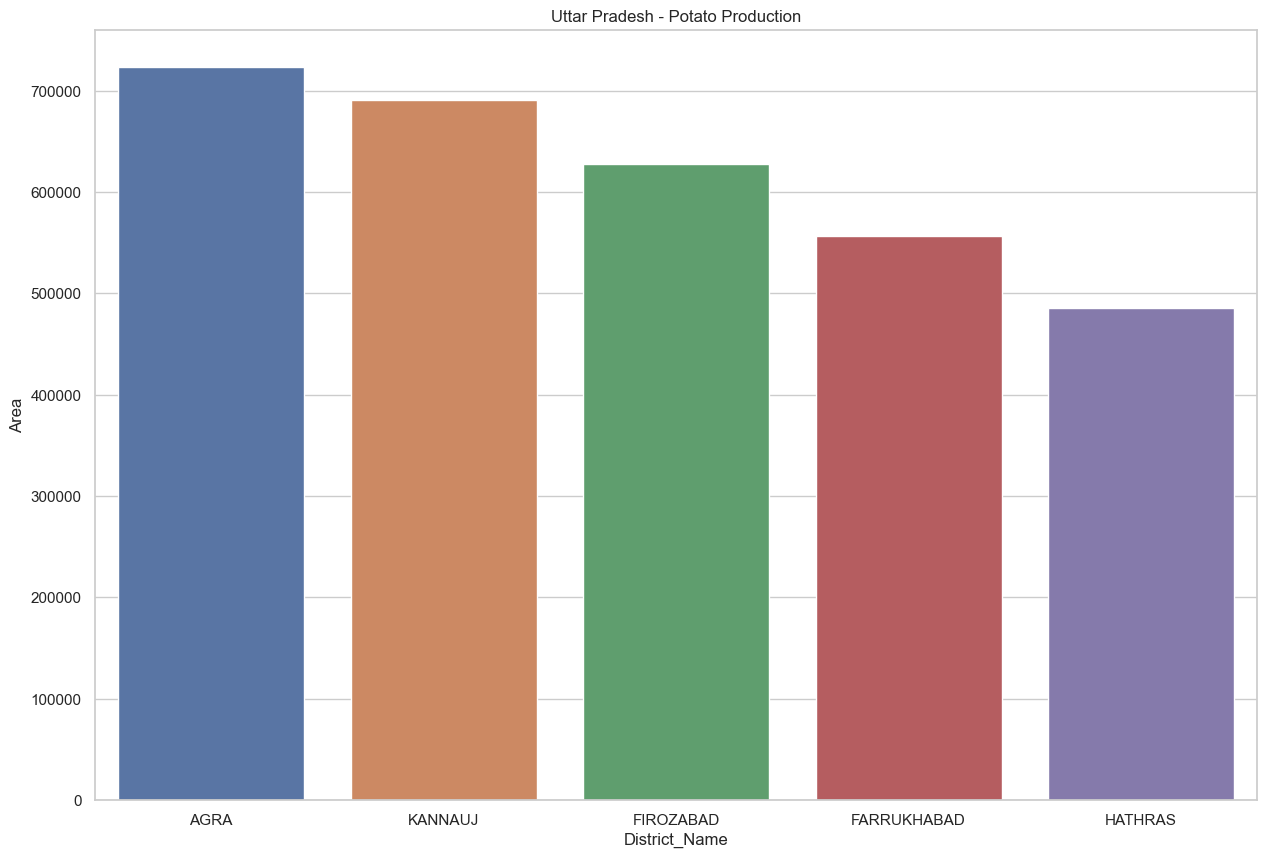

In [35]:
uttarpr_df = potato_df[(potato_df['State_Name'] == 'Uttar Pradesh')]
df = uttarpr_df.groupby(by=['District_Name', 'Crop'])['Area'].sum().reset_index().sort_values(by='Area', ascending=False)
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x='District_Name',y='Area',data=df.head(5), errwidth=0)
plt.title('Uttar Pradesh - Potato Production')
df.head(5)